In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [219]:
# Load the CSV data into a pandas DataFrame
df = pd.read_csv("data/sensor_data1.csv")

In [220]:
# Define boundaries for accelerometer data
accel_x_min, accel_x_max = -2, -1
accel_y_min, accel_y_max = -1.3, 0
accel_z_min, accel_z_max = 3, 5

In [221]:

# Initialize variables to store defect points
defect_points = []

# Iterate through the DataFrame rows
for i in range(1, len(df)):
    # Check accelerometer data boundaries
    if (
        df.loc[i, 'Accelerometer X'] < accel_x_min or df.loc[i, 'Accelerometer X'] > accel_x_max or
        df.loc[i, 'Accelerometer Y'] < accel_y_min or df.loc[i, 'Accelerometer Y'] > accel_y_max or
        df.loc[i, 'Accelerometer Z'] < accel_z_min or df.loc[i, 'Accelerometer Z'] > accel_z_max
    ):
        # Check if ultrasonic measurement has changed by 2 inches compared to the previous
        if abs(df.loc[i, 'Ultrasonic (inches)'] - df.loc[i-1, 'Ultrasonic (inches)']) == 0:
            defect_points.append(i)

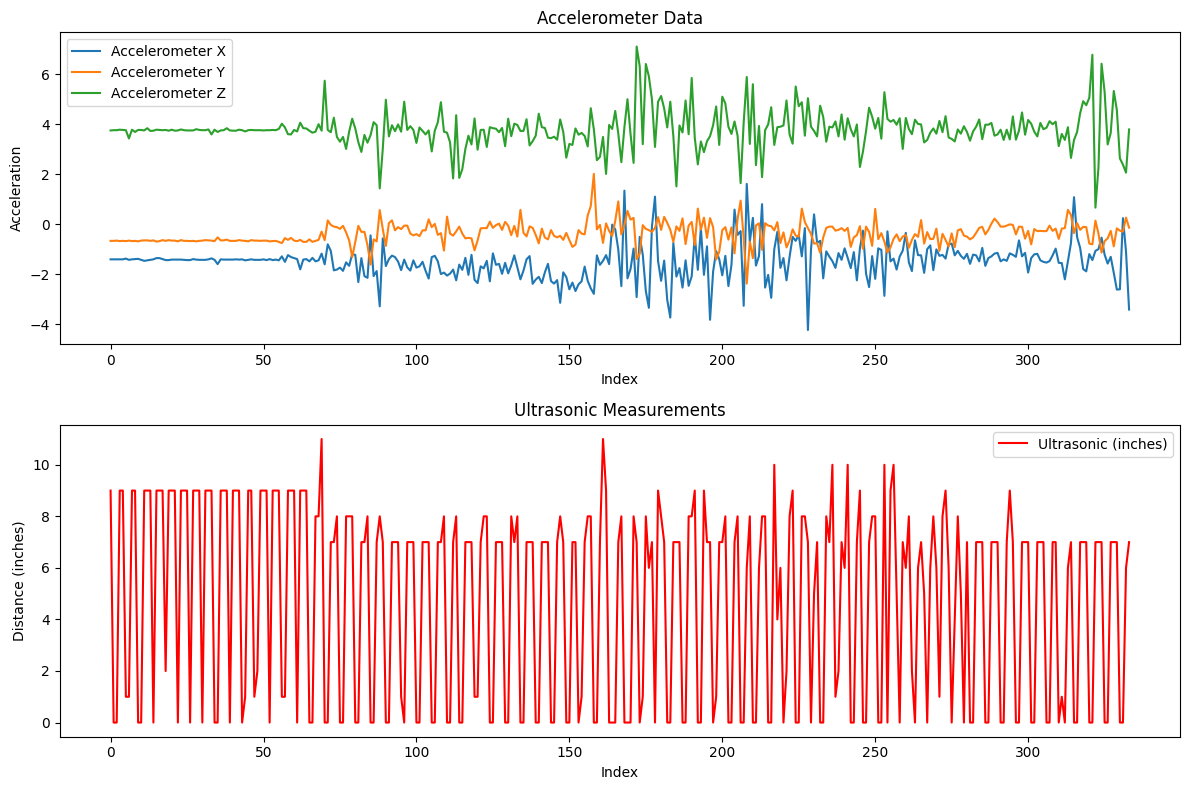

In [222]:
# Visualize accelerometer data and ultrasonic measurements
plt.figure(figsize=(12, 8))

# Plot accelerometer data
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Accelerometer X'], label='Accelerometer X')
plt.plot(df.index, df['Accelerometer Y'], label='Accelerometer Y')
plt.plot(df.index, df['Accelerometer Z'], label='Accelerometer Z')

# Mark defect points on the accelerometer plot
# plt.scatter(defect_points, df.iloc[defect_points]['Accelerometer Y'], color='red', label='Defect Points')

plt.title('Accelerometer Data')
plt.xlabel('Index')
plt.ylabel('Acceleration')
plt.legend()

# Plot boundaries
# plt.axhline(y=accel_y_min, color='r', linestyle='--', label='Boundary')
# plt.axhline(y=accel_y_max, color='r', linestyle='--')

plt.legend()

# Plot ultrasonic measurements
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Ultrasonic (inches)'], label='Ultrasonic (inches)', color='red')
plt.title('Ultrasonic Measurements')
plt.xlabel('Index')
plt.ylabel('Distance (inches)')
plt.legend()

plt.tight_layout()
plt.show()

In [225]:
# Initialize variables to store defect points
defect_points = []

# Iterate through the DataFrame rows
for i in range(1, len(df)):
    # Check accelerometer data boundaries
    if (
        
        df.loc[i, 'Accelerometer X'] < accel_x_min or df.loc[i, 'Accelerometer X'] > accel_x_max or
        df.loc[i, 'Accelerometer Y'] < accel_y_min or df.loc[i, 'Accelerometer Y'] > accel_y_max or
        df.loc[i, 'Accelerometer Z'] < accel_z_min or df.loc[i, 'Accelerometer Z'] > accel_z_max
    ):
        # Check if ultrasonic measurement has changed by 2 inches compared to the previous
        if abs(df.loc[i, 'Ultrasonic (inches)'] - df.loc[i-1, 'Ultrasonic (inches)']) == 0:
            defect_points.append(df.iloc[i])

In [226]:
# # Convert defect points to DataFrame
defect_df = pd.DataFrame(defect_points)

# Create a Folium map centered on the mean of latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for defect points
for index, row in defect_df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Time'], icon=folium.Icon(color='red')).add_to(mymap)

# Add a line connecting all coordinates
coordinates = list(zip(df['Latitude'], df['Longitude']))
folium.PolyLine(locations=coordinates, color='red').add_to(mymap)

# Save the map to an HTML file
mymap.save("defects_map.html")

# Display the map
mymap
